In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

* Lets learn data structure using statistics descriptive 

The first thing we are going to do is to read in the dataset using the Pandas' read_csv() function. We will put this data into a Pandas DataFrame, called "titanic", and name each of the columns.



In [ ]:
url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'
data = pd.read_csv(url)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


* **About the dataset** " section is used for getting the insights about the housing dataset and patterns in data. The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:
**VARIABLE DESCRIPTIONS**
  * Long 
  * Lat 
  * Housing median age 
  * total_rooms
  * total_bedrooms
  * population
  * households
  * median_income
  * median_house_value
  * ocean_proximity

* Use data.head() 
* data.info() 

In [ ]:
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* There are 20,640 instances in the dataset, notice that the total_bed_rooms attribute has only 20,433 
nonnull values, meaning that 207 districts are missing this feature. We will need to take care of this 
later.


* lets use value_counts to have an idea about different categories in the categorical variables 


In [ ]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

* **Checking for missing values** 
  * It's easy to check for missing values by calling the isnull() method, and the sum() method off of that, to return a tally of all the True values that are returned by the isnull() method.

In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

* **Data visualisation** 

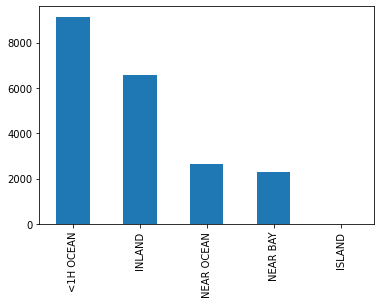

In [ ]:
data["ocean_proximity"].value_counts().plot(kind ="bar")

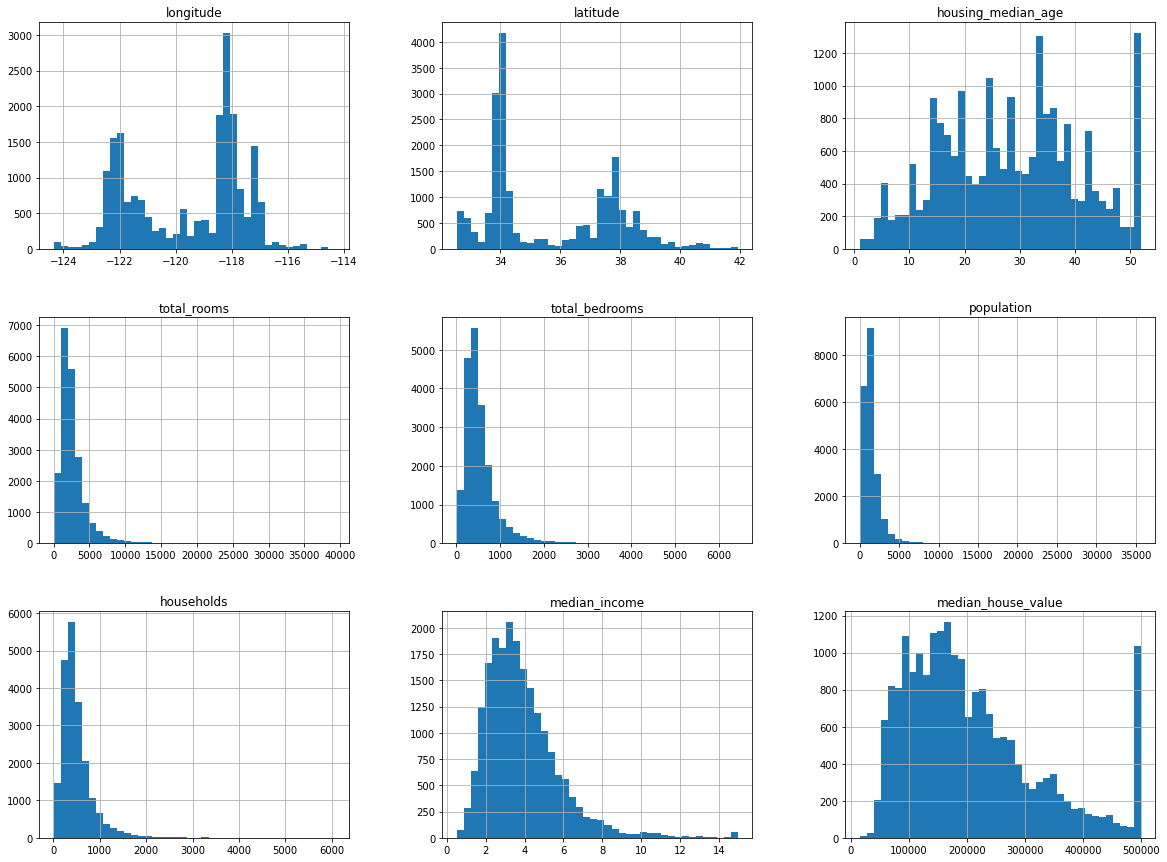

In [ ]:
data.hist(bins=40,figsize=(20,15))
plt.show()

* **The hist() method relies on Matplotlib, which in turn relies on a user-specified graphical backend to draw on your screen. So before you can plot anything, you need to specify which backend Matplotlib should use. The simplest option is to use Jupyter’s magic command %matplotlib inline. This tells Jupyter 
to set up Matplotlib so it uses Jupyter’s own backend. Plots are then rendered within the
notebook itself. Note that calling show() is optional in a Jupyter notebook, as Jupyter will automatically display plots when a cell is executed**


* **Correlation**

The dataset is not too large, you can easily compute the standard correlation
coefficient (also called Pearsons r) between every pair of attributes using the corr()
method 

* **Visualize the geographical data**

s - the radius of circles represents the population size

c - the color of the circles represents the price

* The radius of each circle represents the districts population (option s), and the color 
represents the price (option c).
* Use a predefined color map (option cmap) called jet, which 
ranges from blue (low values) to red (high prices)


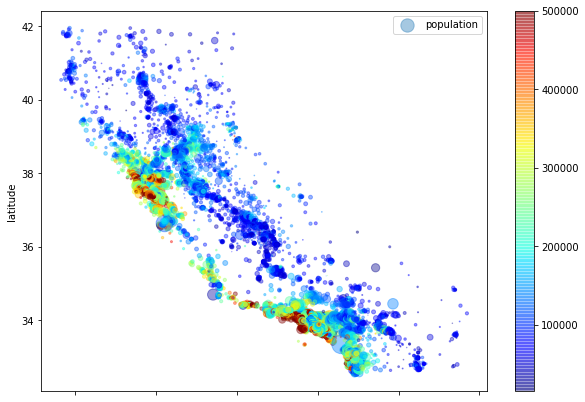

In [ ]:
data.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4,
            s = data["population"]/100, label = "population",
            c = data["median_house_value"], cmap = "jet", colorbar = True, figsize = (10,7))
plt.legend()

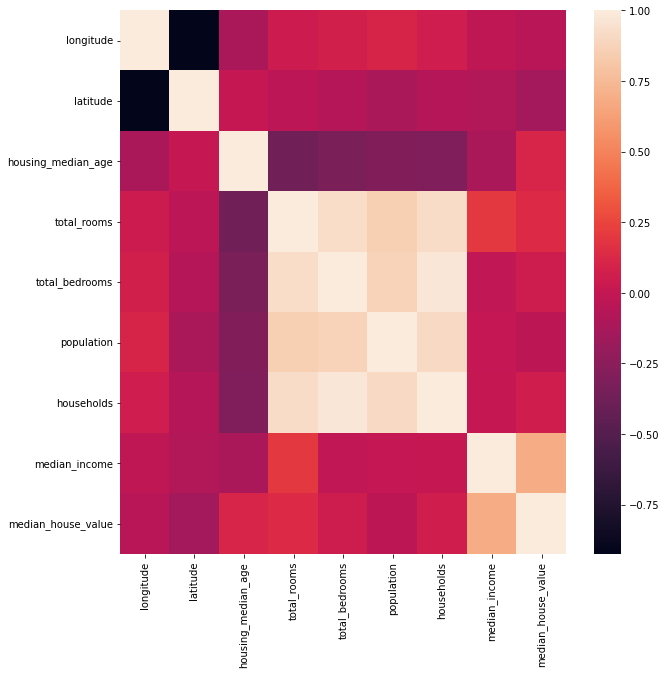

In [ ]:
plt.figure(figsize = (10,10))
sb.heatmap(data.corr())

* **It is visible from the correlation matrix that the median house value (target variable) is negatively correlated to latitude and population: the norther the house, the smaller the value.**


* **Also, median house value is positively correlated to median income, meaning the higher the median income in the district, the higher the median house value.**

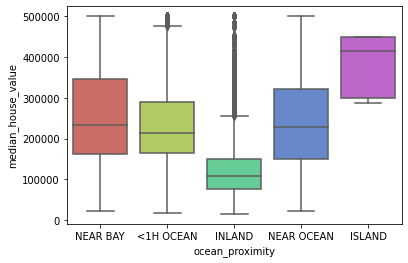

In [ ]:

sb.boxplot(x='ocean_proximity', y='median_house_value', data=data, palette='hls')

* **Taking care of missing values** 
* **Imputing missing values**

* **Most Machine Learning algorithms cannot work with missing features, so let’s create
a few functions to take care of them. 
We saw earlier that the total_bedrooms attribute has some missing values, so let’s fix this. You have three options:**
*  Get rid of the corresponding districts.
* Get rid of the whole attribute.
*  Set the values to some value (zero, the mean, the median, etc.).

In [ ]:
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())
#Imputing by using the mean 

In [ ]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64